Display Help

In [1]:
from mofgbmlpy.fuzzy.knowledge.factory.homo_triangle_knowledge_factory_5 import HomoTriangleKnowledgeFactory_5
from mofgbmlpy.main.moead.mofgbml_moead_main import MoFGBMLMOEADMain
from mofgbmlpy.fuzzy.knowledge.factory.homo_triangle_knowledge_factory_2_3_4_5 import HomoTriangleKnowledgeFactory_2_3_4_5
from mofgbmlpy.main.nsgaii.mofgbml_nsgaii_main import MoFGBMLNSGAIIMain

# runner = MoFGBMLNSGAIIMain(HomoTriangleKnowledgeFactory_2_3_4_5)
# results = runner.main(["--help"])

In [2]:
%matplotlib inline

Run MoFGBMLPy

In [3]:
args = [
    "--data-name", "iris",
    "--algorithm-id", "1",
    "--experiment-id", "2",
    "--train-file", "../dataset/iris/a0_0_iris-10tra.dat",
    "--test-file", "../dataset/iris/a0_0_iris-10tst.dat",
    "--terminate-evaluation", "30000",
    "--objectives", "total-rule-length", "error-rate",
    # "--crossover-type", "pittsburgh-crossover",
    # "--antecedent-factory", "all-combination-antecedent-factory",
]

runner = MoFGBMLNSGAIIMain(HomoTriangleKnowledgeFactory_5)
results = runner.main(args)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       60 |      2 |             - |             -
     2 |      120 |      6 |  0.7142857143 |         ideal
     3 |      180 |     10 |  0.0116279070 |         ideal
     4 |      240 |     19 |  0.2000000000 |         nadir
     5 |      300 |     32 |  0.6666666667 |         nadir
     6 |      360 |     54 |  0.0060292851 |             f
     7 |      420 |     60 |  0.000000E+00 |             f
     8 |      480 |     60 |  0.000000E+00 |             f
     9 |      540 |     60 |  0.000000E+00 |             f
    10 |      600 |     60 |  0.000000E+00 |             f
    11 |      660 |     60 |  0.000000E+00 |             f
    12 |      720 |     60 |  0.000000E+00 |             f
    13 |      780 |     60 |  0.000000E+00 |             f
    14 |      840 |     60 |  0.000000E+00 |             f
    15 |      900 |     60 |  0.000000E+00 |             f
    16 |      960 |     60 |  0.000000E+00 |            

In [4]:
min_length = results.opt.get("X")[0, 0].get_var(0).get_rule().get_length()
max_length = min_length
for sol in results.opt.get("X")[:, 0]:
    for var in sol.get_vars():
        length = var.get_rule().get_length()
        if length < min_length:
            min_length = length
        elif length > max_length:
            max_length = length
print(min_length, max_length) 

1 1


Visualization

In [5]:
i = 1
for var in results.opt.get("X")[0, 0].get_vars():
    print(f"{i}:\t{var.get_rule().get_linguistic_representation()}")
    i += 1

1:	IF	  x3 IS very_low_5 THEN Class is  0 RW: 1.0000
2:	IF	  x2 IS medium_5 THEN Class is  1 RW: 0.7360
3:	IF	  x3 IS high_5 THEN Class is  2 RW: 0.6300
4:	IF	  x3 IS very_high_5 THEN Class is  2 RW: 1.0000


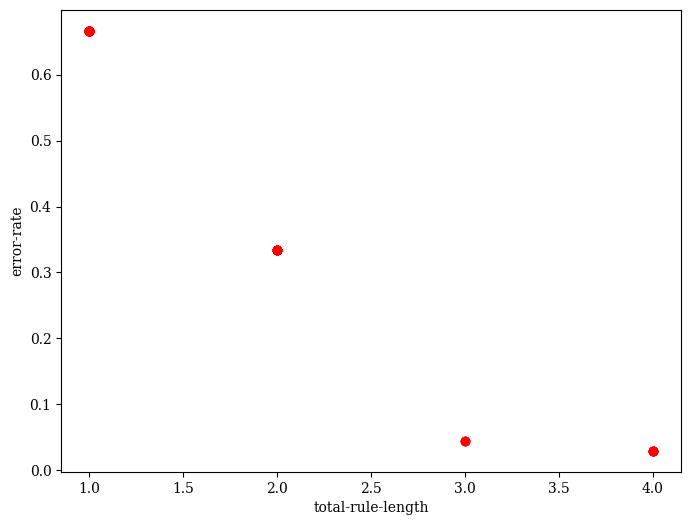

In [6]:
runner.get_pareto_front_plot(results.opt).show()

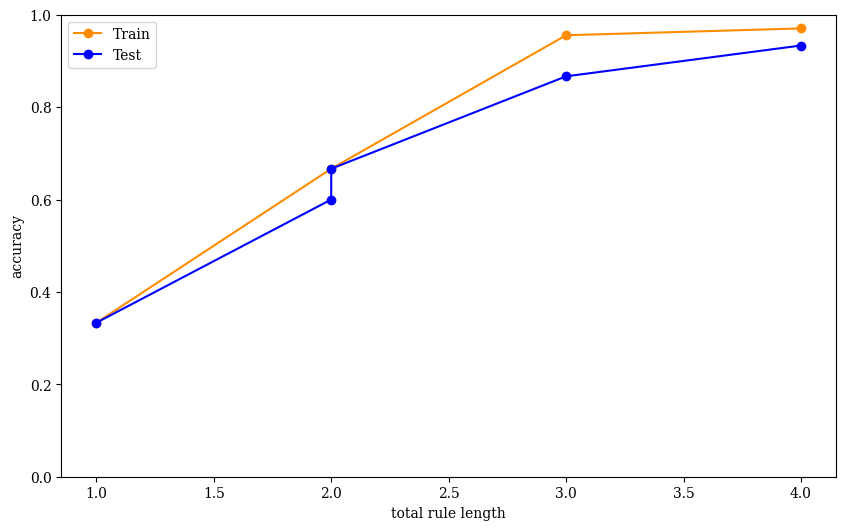

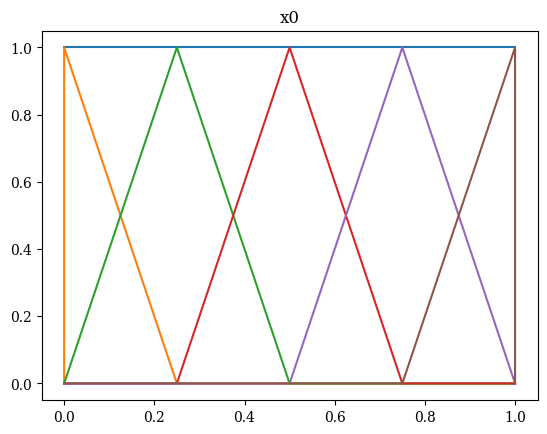

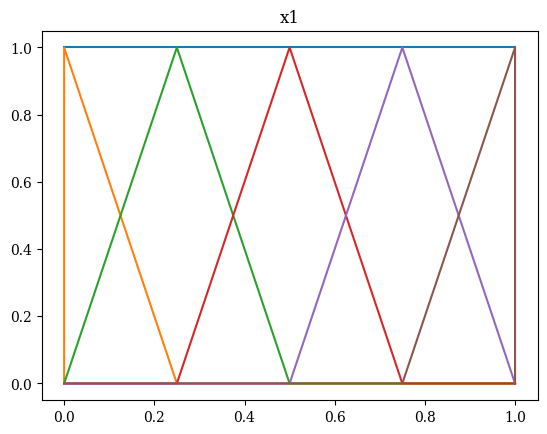

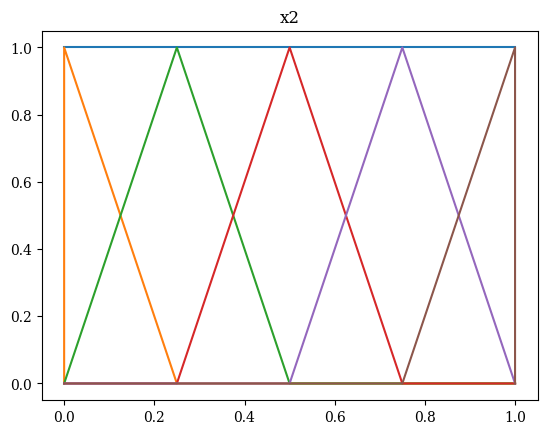

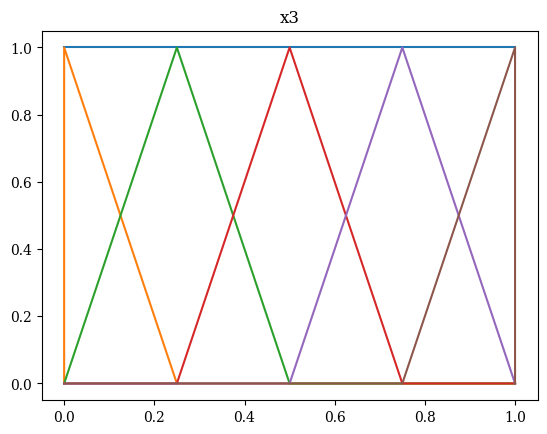

In [7]:
runner.plot_line_interpretability_acc_tradeoff(results.opt)
runner.plot_fuzzy_variables()

In [8]:
runner.save_video(results.history, "nsgaii_iris.mp4")

If the video doesn't play you can just get it in examples/ga.mp4

In [9]:
from IPython.display import Video
Video('./nsgaii_iris.mp4')

The time required to run the algorithm


In [10]:
results.exec_time

19.506130695343018

The final Population (Pymoo individual objects)

In [11]:
results.pop

Population([<pymoo.core.individual.Individual object at 0x00000277134B0810>,
           dtype=object)

The best population design space values (here there is one variable which is a Pittsburgh solution)

In [12]:
results.X

array([[(Pittsburgh Solution) Variables: [(MichiganSolution) Variables: [0 0 0 1 ], Rule weight: 1.0000, Class label:  0], Objectives: [0.0 ], Attributes: {Number of classifier patterns: 5, Number of wins: 5, } (MichiganSolution) Variables: [0 0 3 0 ], Rule weight: 0.7360, Class label:  1], Objectives: [0.0 ], Attributes: {Number of classifier patterns: 5, Number of wins: 6, } (MichiganSolution) Variables: [0 0 0 4 ], Rule weight: 0.6300, Class label:  2], Objectives: [0.0 ], Attributes: {Number of classifier patterns: 2, Number of wins: 2, } (MichiganSolution) Variables: [0 0 0 5 ], Rule weight: 1.0000, Class label:  2], Objectives: [0.0 ], Attributes: {Number of classifier patterns: 2, Number of wins: 2, } ] Objectives 4.0 0.02962962962962963 ] Attributes: {'id': 0, 'total_coverage': 0.0625, 'total_rule_length': 4, 'average_rule_weight': 0.8414933993399338, 'training_error_rate': 0.02962962962962963, 'test_error_rate': 0.06666666666666667, 'num_rules': 4}],
       [(Pittsburgh Soluti

The best population objective spaces values

In [13]:
results.F

array([[4.        , 0.02962963],
       [4.        , 0.02962963],
       [1.        , 0.66666667],
       [1.        , 0.66666667],
       [2.        , 0.33333333],
       [3.        , 0.04444444],
       [2.        , 0.33333333],
       [3.        , 0.04444444],
       [1.        , 0.66666667],
       [2.        , 0.33333333],
       [1.        , 0.66666667],
       [1.        , 0.66666667],
       [1.        , 0.66666667],
       [1.        , 0.66666667],
       [4.        , 0.02962963],
       [1.        , 0.66666667],
       [1.        , 0.66666667],
       [1.        , 0.66666667],
       [1.        , 0.66666667],
       [1.        , 0.66666667],
       [2.        , 0.33333333],
       [2.        , 0.33333333],
       [1.        , 0.66666667],
       [1.        , 0.66666667],
       [1.        , 0.66666667],
       [1.        , 0.66666667],
       [1.        , 0.66666667],
       [1.        , 0.66666667],
       [1.        , 0.66666667],
       [2.        , 0.33333333],
       [1.

Algorithm object which has been iterated over (e.g. NSGA2 from Pymoo)

In [14]:
results.algorithm

Archive population (populations of each generation)

In [15]:
results.archive.get("X")
# results.archive.get("F")

array([[(Pittsburgh Solution) Variables: [(MichiganSolution) Variables: [0 0 1 0 ], Rule weight: 1.0000, Class label:  0], Objectives: [0.0 ], Attributes: {Number of classifier patterns: 43, Number of wins: 43, } (MichiganSolution) Variables: [0 0 0 3 ], Rule weight: 0.7946, Class label:  1], Objectives: [0.0 ], Attributes: {Number of classifier patterns: 43, Number of wins: 46, } (MichiganSolution) Variables: [0 0 4 0 ], Rule weight: 0.4834, Class label:  2], Objectives: [0.0 ], Attributes: {Number of classifier patterns: 14, Number of wins: 14, } (MichiganSolution) Variables: [0 0 2 0 ], Rule weight: 0.6805, Class label:  0], Objectives: [0.0 ], Attributes: {Number of classifier patterns: 2, Number of wins: 2, } (MichiganSolution) Variables: [0 0 0 4 ], Rule weight: 0.6300, Class label:  2], Objectives: [0.0 ], Attributes: {Number of classifier patterns: 21, Number of wins: 23, } (MichiganSolution) Variables: [4 0 0 0 ], Rule weight: 0.4680, Class label:  2], Objectives: [0.0 ], Attr

The best solutions as a Population object

In [16]:
results.opt

Population([<pymoo.core.individual.Individual object at 0x00000277134B0810>,
           dtype=object)

Name of the objectives that are minimized

In [17]:
results.objectives_name

['Total rule length', 'Error rate']